<a href="https://colab.research.google.com/github/mbl-cin/ML_models/blob/main/Projeto_Aprendizagem_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conectando o notebook ao drive do projeto



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importando bibliotecas


In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import graphviz
from matplotlib import rcParams
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import rcParams
from sklearn.pipeline import Pipeline

rcParams['figure.figsize'] = 12, 8


#Importando os dados e tratando eles

In [ ]:
# Importando os dados presentes no drive
df = pd.read_csv('/content/drive/MyDrive/ProjetoAM/Projeto/winequality-red.csv', delimiter=';')

##Estrutura dos dados




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
quality_counts = df['quality'].value_counts().sort_index()

print(quality_counts)

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


## Análise exploratória

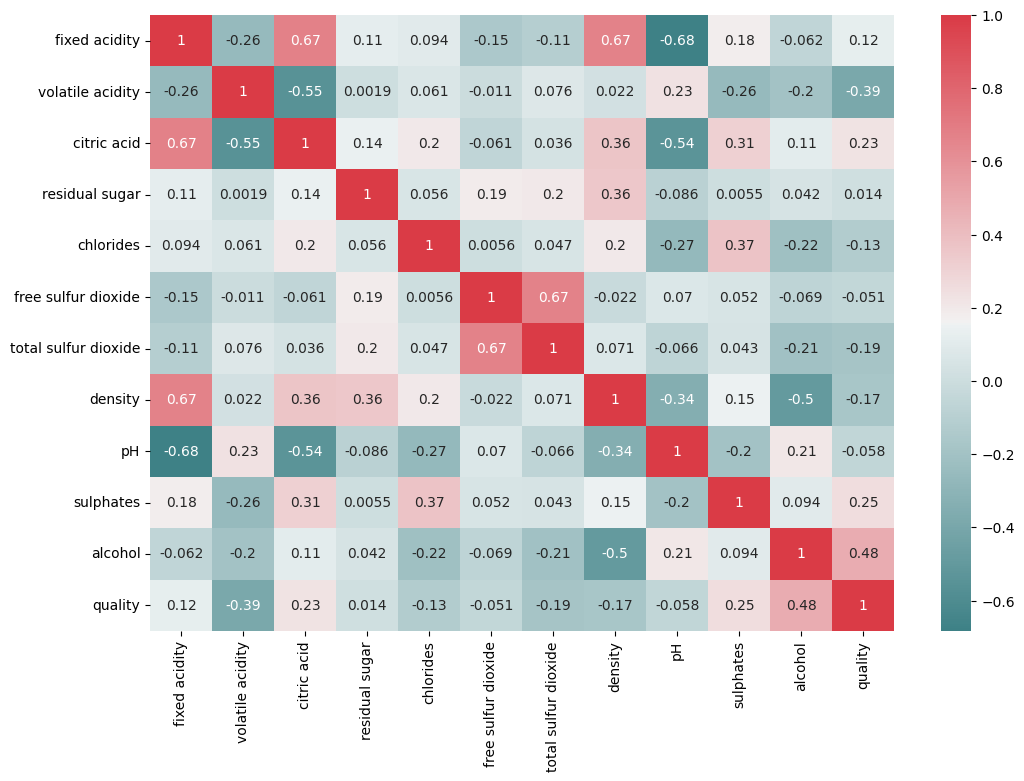

In [ ]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()

## Separando features e target

In [ ]:
#Separação das features e target
X = df.drop(columns=['quality'])
y = df['quality']

## Dividindo o conjunto de teste e treinamento

In [ ]:
# Divisão do conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


#Arvore de decisão

## Inicializando e treinando o modelo

In [ ]:
# Inicializando a arvore de decisão
DT_clf = DecisionTreeClassifier(random_state=1)
DT_clf.fit(X_train, y_train)
dt_pred = DT_clf.predict(X_test)

## Desempenho inicial

In [ ]:
# Resultados
print(classification_report(y_test, dt_pred, digits=4))

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         3
           4     0.0526    0.0625    0.0571        16
           5     0.7143    0.6618    0.6870       204
           6     0.6202    0.6719    0.6450       192
           7     0.5577    0.4833    0.5179        60
           8     0.2222    0.4000    0.2857         5

    accuracy                         0.6167       480
   macro avg     0.3612    0.3799    0.3655       480
weighted avg     0.6254    0.6167    0.6196       480



In [ ]:
# Avaliando usando validação cruzada
scores = cross_val_score(DT_clf, X_train, y_train, cv=5, scoring='f1_macro')

# Exibindo os resultados da validação cruzada
print(f'Validação cruzada F1 score (média): {scores.mean()}')

Validação cruzada F1 score (média): 0.2979018985915893


## Realizando GridSearchCV e treinando o novo modelo

In [ ]:
# Definindo o grid de parâmetros
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2,5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10,20],
    'criterion': ['gini', 'entropy']
}

# Inicializando o GridSearchCV
grid_search = GridSearchCV(DT_clf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Treinando o modelo com a busca em grade
grid_search.fit(X_train, y_train)

# Printando o melhor modelo encontrado
best_dt_clf = grid_search.best_estimator_
print("Melhores hiperparâmetros:", grid_search.best_params_)

Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}


## Visualização e avaliação do modelo final

### Visualização da árvore

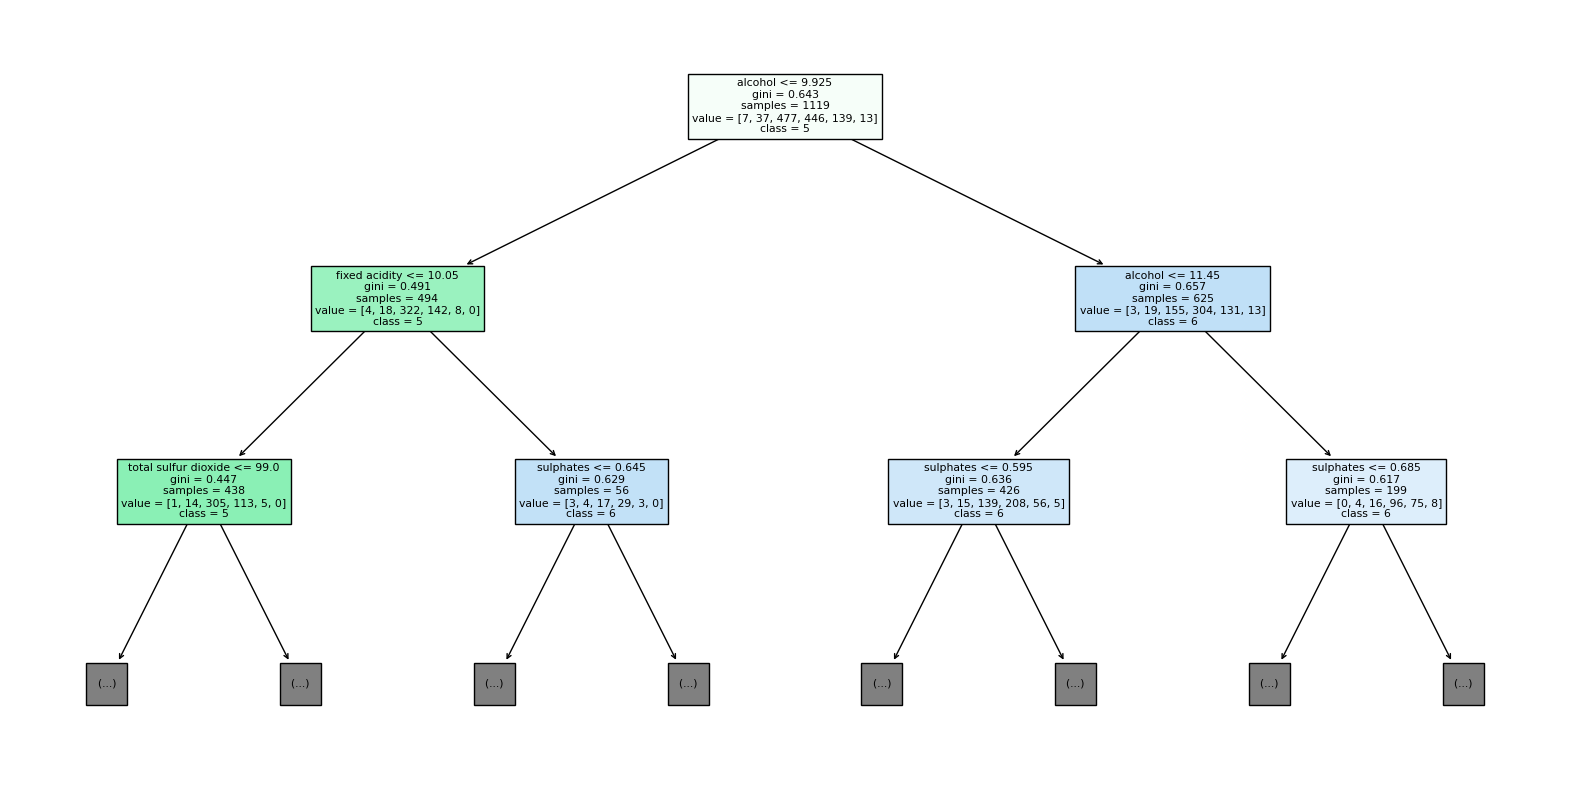

In [ ]:
# Visualizando a árvore de decisão parcial
plt.figure(figsize=(20,10))
plot_tree(best_dt_clf, filled=True, feature_names=df.columns[:-1], class_names=[str(cls) for cls in sorted(y.unique())], max_depth=2)
plt.show()

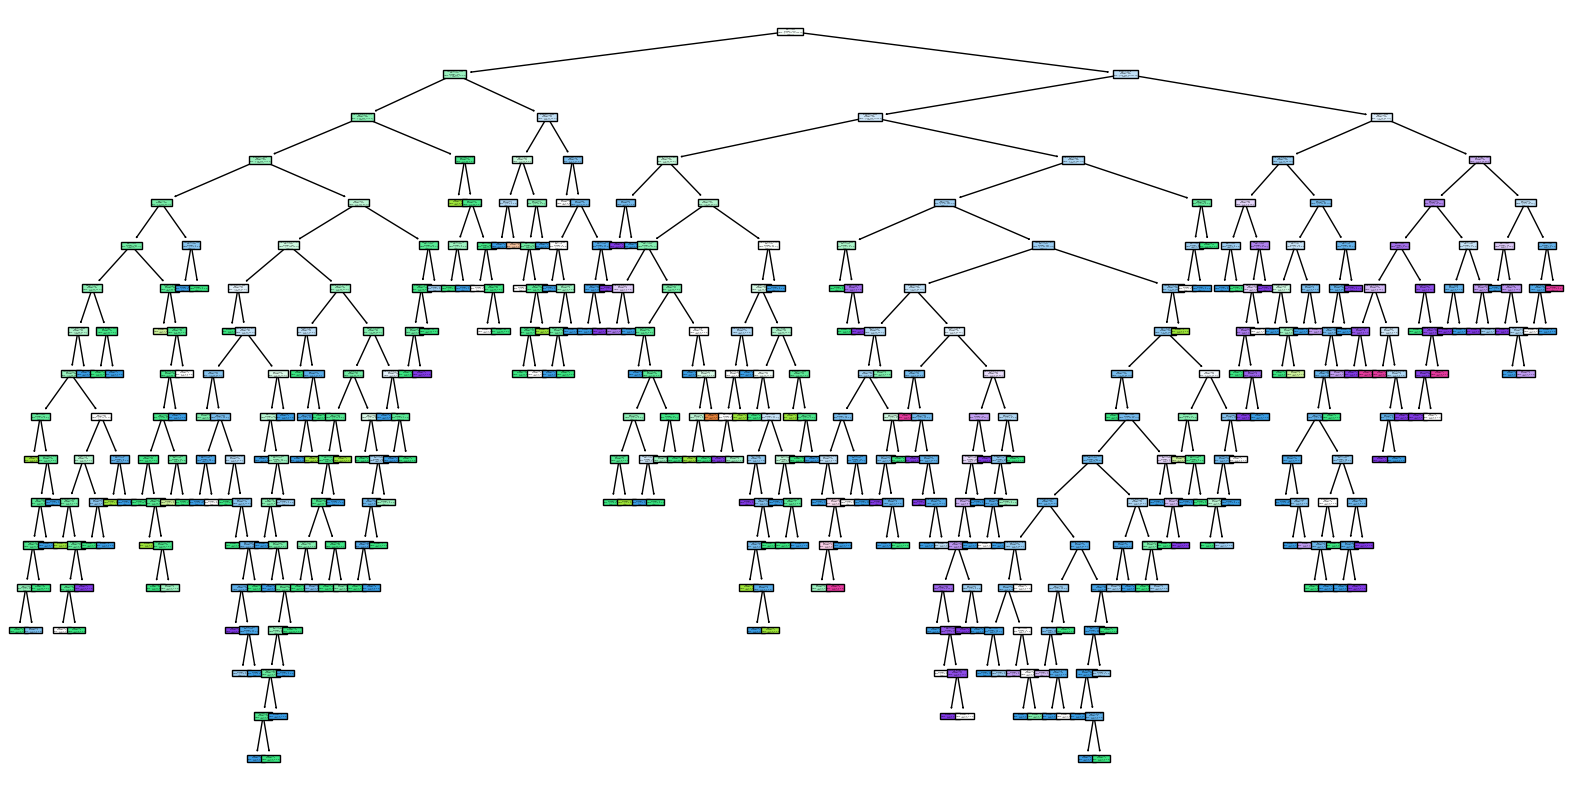

In [ ]:
# Visualizando a árvore de decisão completa
plt.figure(figsize=(20,10))
plot_tree(best_dt_clf, filled=True, feature_names=df.columns[:-1], class_names=[str(cls) for cls in sorted(y.unique())])
plt.show()

### Desempenho final

In [ ]:
# Previsões no conjunto de teste
y_pred = best_dt_clf.predict(X_test)

# Avaliação do modelo
report = classification_report(y_test, y_pred, target_names=[str(cls) for cls in sorted(y.unique())], digits=4)
print(report)

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         3
           4     0.0455    0.0625    0.0526        16
           5     0.7135    0.6716    0.6919       204
           6     0.6212    0.6406    0.6308       192
           7     0.5439    0.5167    0.5299        60
           8     0.2857    0.4000    0.3333         5

    accuracy                         0.6125       480
   macro avg     0.3683    0.3819    0.3731       480
weighted avg     0.6242    0.6125    0.6178       480



In [ ]:
# Avaliar usando validação cruzada
scores = cross_val_score(best_dt_clf, X_train, y_train, cv=5, scoring='f1_macro')

# Exibir os resultados da validação cruzada
print(f'Validação cruzada F1 score (média): {scores.mean()}')

Validação cruzada F1 score (média): 0.3016736503342011


### Matriz de confusão

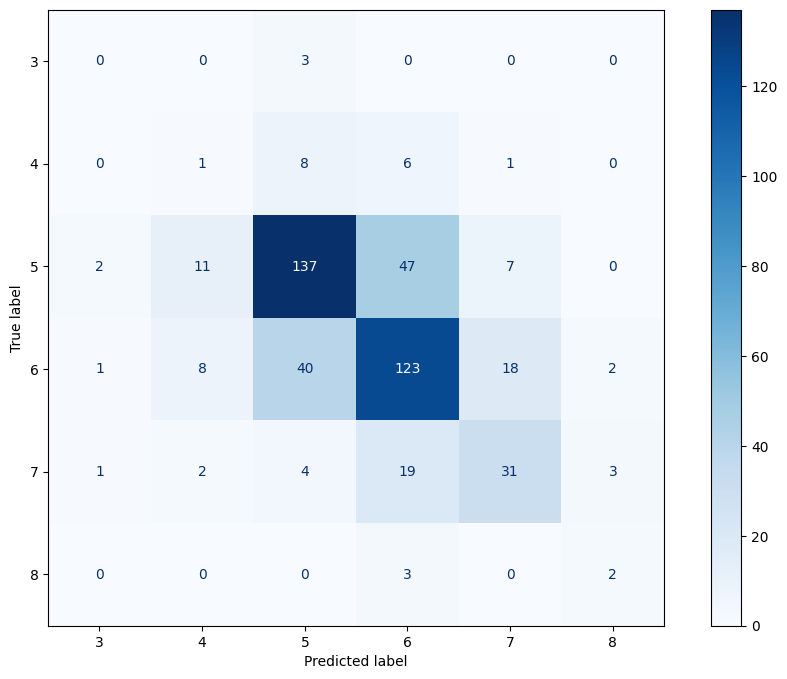

In [ ]:
# Criando a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=best_dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt_clf.classes_)

# Plotando a matriz de confusão
disp.plot(cmap=plt.cm.Blues)
plt.show()

#Bayesiano ingenuo

## Treinando o modelo

In [ ]:
# Criando e treinando o modelo
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

## Desempenho

### Avaliando o modelo

In [ ]:
# Realizando a avaliação do modelo
y_pred = nb_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.20      0.33      0.25         3
           4       0.17      0.19      0.18        16
           5       0.65      0.71      0.68       204
           6       0.52      0.43      0.47       192
           7       0.33      0.35      0.34        60
           8       0.00      0.00      0.00         5

    accuracy                           0.53       480
   macro avg       0.31      0.34      0.32       480
weighted avg       0.53      0.53      0.53       480



In [ ]:
# Avaliar usando validação cruzada
scores = cross_val_score(nb_clf, X_train, y_train, cv=5, scoring='f1_macro')

# Exibir os resultados da validação cruzada
print(f'Validação cruzada F1 score (média): {scores.mean()}')

Validação cruzada F1 score (média): 0.2941103142585286


### Matriz de confusão

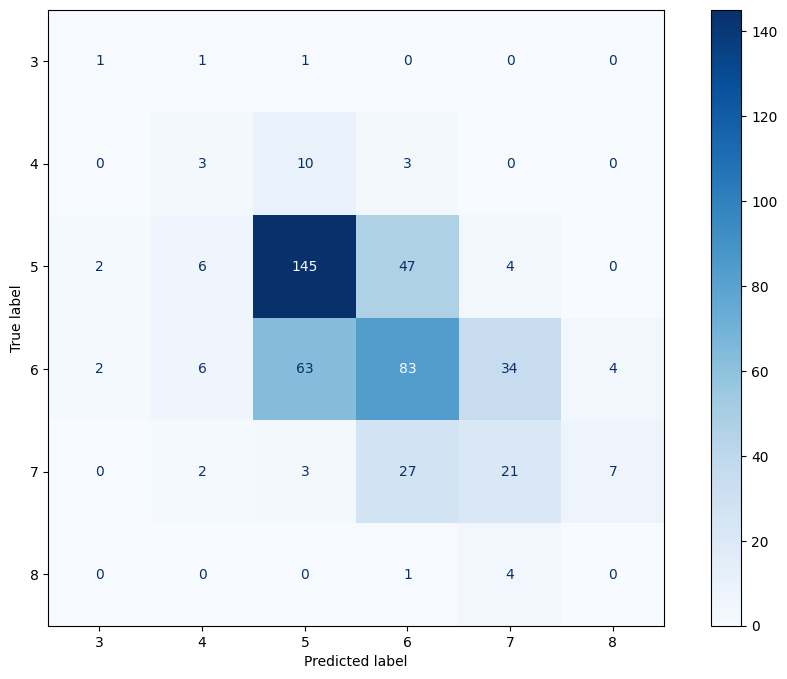

In [ ]:
# Criando a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=nb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_clf.classes_)

# Plotando a matriz de confusão
disp.plot(cmap=plt.cm.Blues)
plt.show()

#Regressão logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

# Definir o modelo
lr = LogisticRegression(max_iter=1000, random_state=1)

# Definir os hiperparâmetros para busca
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Configurar a validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
#buscando os melhores hiperparametros utilizando cv
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=cv, scoring='f1')



In [ ]:
# Treinar o modelo
grid_search.fit(X_train, y_train)

# Seleciona o melhor modelo baseado na busca.
best_lr = grid_search.best_estimator_
print(f'Melhores hiperparâmetros: {grid_search.best_params_}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __cal

Melhores hiperparâmetros: {'C': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Gera previsões para o conjunto de teste.
y_pred = best_lr.predict(X_test)

# Avaliação do modelo com
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=best_lr.classes_)
class_report = classification_report(y_test, y_pred)

print(class_report)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.68      0.78      0.72       204
           6       0.54      0.67      0.60       192
           7       0.20      0.02      0.03        60
           8       0.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.24      0.24      0.23       480
weighted avg       0.53      0.60      0.55       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


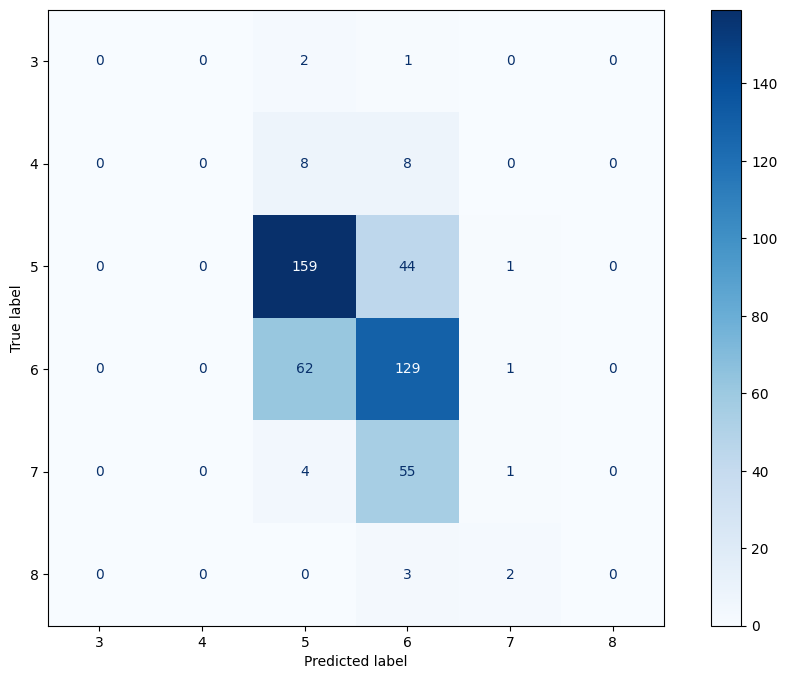

In [ ]:
# Visualização da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_lr.classes_)

# Plotando a matriz de confusão
disp.plot(cmap=plt.cm.Blues)
plt.show()

#K-vizinhos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Definir o modelo
knn = KNeighborsClassifier()

# Definir os hiperparâmetros para busca
param_grid = {'n_neighbors': list(range(1, 31)), 'p': [2]}  # p=2 for Euclidean distance

# Configurar a validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='f1')

# Treinar o modelo
grid_search.fit(X_train, y_train)

# Melhor modelo
best_knn = grid_search.best_estimator_
print(f'Melhores hiperparâmetros: {grid_search.best_params_}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/l

Melhores hiperparâmetros: {'n_neighbors': 1, 'p': 2}


In [ ]:
# Previsões
y_pred = best_knn.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=best_knn.classes_)
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           3       0.25      0.33      0.29         3
           4       0.00      0.00      0.00        16
           5       0.66      0.65      0.65       204
           6       0.54      0.58      0.56       192
           7       0.57      0.45      0.50        60
           8       0.00      0.00      0.00         5

    accuracy                           0.57       480
   macro avg       0.34      0.34      0.33       480
weighted avg       0.57      0.57      0.57       480



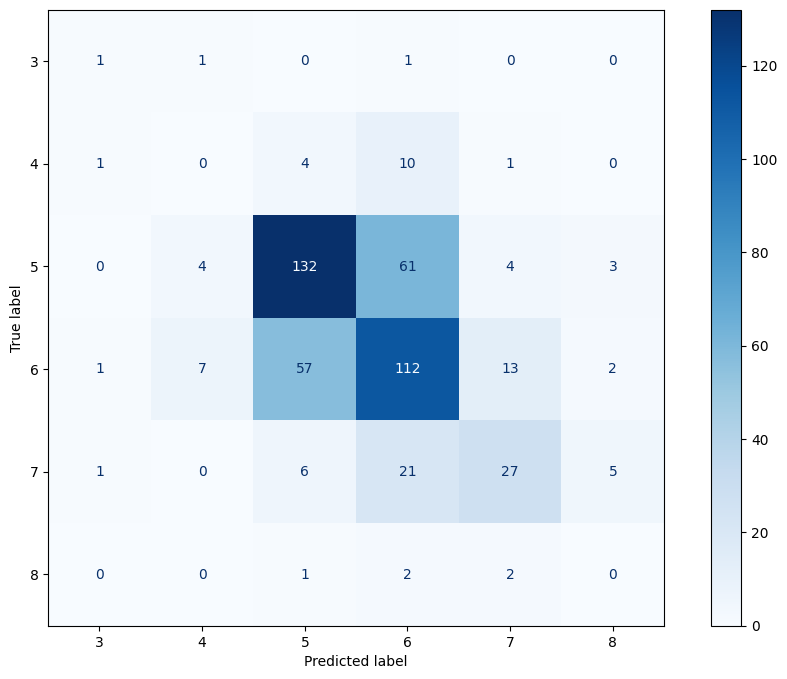

In [ ]:
# Visualização da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_knn.classes_)

# Plotando a matriz de confusão
disp.plot(cmap=plt.cm.Blues)
plt.show()